In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,average_precision_score,f1_score,precision_recall_curve,roc_curve, auc

In [4]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [7]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from imblearn.combine import SMOTETomek
from collections import Counter

In [8]:
#Data Analysis
df = pd.read_csv(r"C:\Users\Saleem\Downloads\customer prediction dataset\train(1).csv")
df.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [9]:
df.shape

(200000, 202)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


In [11]:
df.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [12]:
df.isnull().sum()

ID_code    0
target     0
var_0      0
var_1      0
var_2      0
          ..
var_195    0
var_196    0
var_197    0
var_198    0
var_199    0
Length: 202, dtype: int64

In [13]:
df['target'].value_counts()

target
0    179902
1     20098
Name: count, dtype: int64

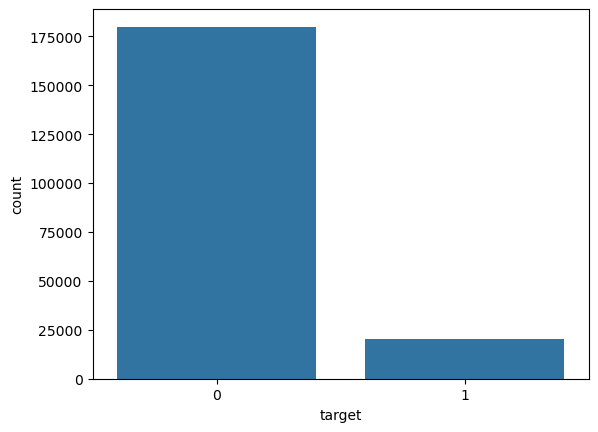

In [14]:
sns.countplot(data=df,x='target')
plt.show()

In [15]:
# Step 1: Drop ID_code
df = df.drop(columns=['ID_code'])

In [16]:
# Step 2: Separate features and target
X = df.drop(columns=['target'])
y = df['target']

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

In [18]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [19]:
# Optional: Convert back to DataFrames
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X.columns,index = X_train.index)
X_test_scaled  = pd.DataFrame(X_test_scaled,columns=X.columns,index = X_test.index)

In [20]:
X_train_scaled.head()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
172692,1.555270,-0.115256,-0.090881,-0.932636,0.968221,0.170423,-0.309721,0.338880,1.189966,0.881784,...,-1.339254,0.240479,-0.564889,-0.303091,-0.104583,2.350448,-0.811745,0.046862,-0.837039,-1.217083
123366,0.549781,-1.613396,0.400775,-1.915683,0.763583,-0.243919,-1.318395,-2.010924,0.836428,-2.218473,...,-0.655463,0.237900,-2.032963,0.534872,1.805255,-0.254927,1.273239,-0.722781,-1.697885,-0.011200
6709,-0.418534,-1.723712,-1.321795,-1.738047,-0.260714,0.220690,-0.357649,0.582846,0.478119,1.642946,...,1.080822,0.596005,-0.616827,1.032407,-0.283406,0.146067,-1.164373,0.597305,0.666481,-1.021567
30154,0.782401,0.208308,0.872517,0.973707,-0.525394,0.270626,1.519026,-1.368265,-0.721995,0.840666,...,1.349807,0.039735,-0.980866,-0.530386,0.341025,-0.996664,0.918758,-0.514655,0.743309,-0.426065
181706,-0.383004,0.336508,-0.944816,0.787892,1.043721,-0.666181,-0.763653,-0.808791,-0.431291,-0.985347,...,1.150150,-2.130221,1.401978,-0.349291,2.073667,-1.322380,-0.522245,-0.176246,1.829465,1.677827


In [21]:
X_test_scaled.head()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
199837,-0.617575,2.067877,-0.539598,-0.949047,-0.117587,1.109712,-0.780824,-0.708148,0.482252,-0.327288,...,0.363513,-0.975830,0.059622,0.433126,0.236331,-0.066342,0.326246,-1.058603,0.577820,-0.387862
149409,-1.020900,-1.695577,1.817385,-1.517051,0.663112,-0.270588,-0.236720,-0.816388,0.677323,0.438395,...,1.548013,1.478151,0.778000,-1.008299,1.368923,-1.403867,0.329702,0.391269,-1.220583,0.444370
43642,-1.583372,-1.311341,-0.972408,-0.014670,-1.243398,1.278155,-0.797200,1.359128,-1.153571,0.611492,...,-0.698589,0.934117,-1.509793,0.882259,-0.901226,-0.241917,-0.077605,-0.226610,0.928067,1.418102
157332,1.655988,-1.526470,-0.892690,-0.226696,-0.779978,1.539028,-1.011125,-1.392730,0.921664,1.068437,...,1.889305,-1.013322,0.701300,-0.208826,0.187703,0.858653,-1.135023,-0.121284,-0.979268,0.019402
189470,1.617352,-1.242564,0.504364,0.205017,-0.428571,-0.502564,-0.594888,0.668132,-1.674151,-0.181838,...,1.024708,0.983499,0.950995,-0.726396,-0.634157,0.657585,-1.032273,-1.207227,0.796483,0.012895


In [22]:
X_train_scaled.shape

(160000, 200)

In [23]:
X_test_scaled.shape

(40000, 200)

To improve model performance and reduce overfitting, we used feature importance analysis to identify and retain only the most influential features. Given that the dataset contains 200 anonymized features (var_0 to var_199), many of them may be noisy, redundant, or irrelevant to the target variable. By using XGBoost’s built-in feature importance scores, we ranked all features based on their contribution to predictive performance. We then selected the top 100 most important features for training. This dimensionality reduction not only enhances training speed and model generalization but also focuses the learning on the most informative variables, which is crucial when working with high-dimensional or imbalanced datasets.


In [24]:
xgb = XGBClassifier(
    eval_metric = 'logloss',
    random_state = 42,
    n_jobs=-1
)

In [25]:
xgb.fit(X_train_scaled,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, ...)

In [26]:
importances = xgb.feature_importances_
feature_names = X_train_scaled.columns

In [27]:
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance':importances
}).sort_values(by='Importance',ascending=False)

In [28]:
# Step 3: Get Top 100 Features
top_100_features = importance_df['Feature'].head(100).tolist()

In [29]:
# Step 4: Filter Training and Test Sets
X_train_top = X_train_scaled[top_100_features]
X_test_top = X_test_scaled[top_100_features]
print("Selected top 100 features.")
X_train_top.head()

Selected top 100 features.


,var_81,var_139,var_110,var_12,var_53,var_174,var_146,var_6,var_80,var_76,...,var_167,var_82,var_51,var_186,var_48,var_150,var_116,var_135,var_24,var_90
172692,-1.432886,0.859575,0.095463,-0.113015,0.962732,-0.359272,-0.256063,-0.309721,1.653642,0.533261,...,-1.649710,1.465729,-0.808815,-1.747728,0.719050,0.045137,0.698020,1.006885,-0.327429,-1.137884
123366,-0.097573,-1.369135,-0.821140,-0.088298,0.725650,1.638527,1.062935,-1.318395,-0.031454,1.235497,...,-0.074865,0.734989,1.086621,-1.324021,-1.037916,-0.938015,0.123068,1.008039,-0.640220,-1.160994
6709,-0.855559,1.503971,0.938475,1.924825,0.010743,0.289456,-1.269517,-0.357649,1.277462,-1.824401,...,0.008847,1.989398,-0.166486,0.293729,-0.672047,1.475208,-0.603775,0.738167,-0.119926,-0.684072
30154,1.845206,-0.076090,-0.655960,-1.053315,0.644705,-0.884001,-2.530382,1.519026,-0.207242,-0.827749,...,0.998759,0.885513,0.983238,-0.321763,-1.469228,1.342316,0.128220,-1.055375,1.784352,-0.576856
181706,-0.814997,0.975528,-0.136141,0.288242,0.150272,0.929908,-1.070477,-0.763653,0.830902,-0.192248,...,-0.703514,-0.462224,-1.983300,-1.022327,2.055287,0.016976,0.606620,-0.505412,-0.366426,-0.875712


In [30]:
# Step 1: Apply SMOTETomek on the top 100 features
smt = SMOTETomek(random_state=42)
X_train_balanced,y_train_balanced = smt.fit_resample(X_train_top,y_train)

In [31]:
# Step 2: Check new class distribution
print("Before SMOTETomek:", Counter(y_train))
print("After SMOTETomek:", Counter(y_train_balanced))

Before SMOTETomek: Counter({0: 143922, 1: 16078})
After SMOTETomek: Counter({0: 143922, 1: 143922})


Model Training on Balanced Data

In [32]:
# Create a helper function to evaluate models
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(f"\n{name} Results:")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("ROC AUC Score:", roc_auc_score(y_test, y_pred))
    print("PR AUC Score:", average_precision_score(y_test, y_pred))


In [33]:
# Train Logistic Regression
log_reg = LogisticRegression(max_iter=1000,class_weight='balanced',random_state=42)
log_reg.fit(X_train_balanced,y_train_balanced)
evaluate_model("Logistic Regression", log_reg, X_test_top, y_test)


Logistic Regression Results:
Confusion Matrix:
 [[27723  8257]
 [  965  3055]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.77      0.86     35980
           1       0.27      0.76      0.40      4020

    accuracy                           0.77     40000
   macro avg       0.62      0.77      0.63     40000
weighted avg       0.90      0.77      0.81     40000

ROC AUC Score: 0.7652308219878926
PR AUC Score: 0.22936262464199508


In [44]:
rf_model = RandomForestClassifier(n_estimators=1000,max_depth=None,min_samples_split=2,min_samples_leaf=1,class_weight='balanced',n_jobs=-1)
rf_model.fit(X_train_balanced, y_train_balanced)
evaluate_model("RandomForest Classifier", rf_model, X_test_top, y_test)


RandomForest Classifier Results:
Confusion Matrix:
 [[35373   607]
 [ 3801   219]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94     35980
           1       0.27      0.05      0.09      4020

    accuracy                           0.89     40000
   macro avg       0.58      0.52      0.52     40000
weighted avg       0.84      0.89      0.86     40000

ROC AUC Score: 0.5188035641691486
PR AUC Score: 0.10946882205196776


In [34]:
# Train XGBoost
xgb_model=XGBClassifier(eval_metric='logloss', random_state=42, n_jobs=-1)
xgb_model.fit(X_train_balanced,y_train_balanced)
evaluate_model("XGBoost", xgb_model, X_test_top, y_test)


XGBoost Results:
Confusion Matrix:
 [[31158  4822]
 [ 2330  1690]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.87      0.90     35980
           1       0.26      0.42      0.32      4020

    accuracy                           0.82     40000
   macro avg       0.59      0.64      0.61     40000
weighted avg       0.86      0.82      0.84     40000

ROC AUC Score: 0.6431895552808498
PR AUC Score: 0.16735206339310815


In [35]:
lgb_model = LGBMClassifier(class_weight='balanced', random_state=42, n_jobs=-1)
lgb_model.fit(X_train_balanced,y_train_balanced)
evaluate_model("LightGBM", lgb_model, X_test_top, y_test)

[LightGBM] [Info] Number of positive: 143922, number of negative: 143922
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.210723 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 287844, number of used features: 100
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000

LightGBM Results:
Confusion Matrix:
 [[31589  4391]
 [ 2613  1407]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.88      0.90     35980
           1       0.24      0.35      0.29      4020

    accuracy                           0.82     40000
   macro avg       0.58      0.61      0.59     40000
weighted avg       0.86      0.82      0.84     40000

ROC AUC Score: 0.6139799888827127
PR AUC Score: 0.15025946015867542


Tune the Classification Threshold

In [38]:
probs = xgb_model.predict_proba(X_test_top)[:, 1]

best_f1 = 0
best_thresh = 0.5

for t in np.arange(0.2, 0.6, 0.05):
    preds = (probs >= t).astype(int)
    f1 = f1_score(y_test, preds)
    print(f"Threshold: {t:.2f}, F1-score: {f1:.4f}")
    if f1 > best_f1:
        best_f1 = f1
        best_thresh = t

print("Best threshold:", best_thresh)

Threshold: 0.20, F1-score: 0.2804
Threshold: 0.25, F1-score: 0.2919
Threshold: 0.30, F1-score: 0.3042
Threshold: 0.35, F1-score: 0.3115
Threshold: 0.40, F1-score: 0.3186
Threshold: 0.45, F1-score: 0.3224
Threshold: 0.50, F1-score: 0.3209
Threshold: 0.55, F1-score: 0.3158
Best threshold: 0.44999999999999996


In [39]:
y_proba = xgb_model.predict_proba(X_test_top)[:, 1]
y_pred_custom = (y_proba >= 0.45).astype(int)

In [40]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_custom))
print("Classification Report:\n", classification_report(y_test, y_pred_custom))
print("ROC AUC:", roc_auc_score(y_test, y_pred_custom))
print("PR AUC:", average_precision_score(y_test, y_pred_custom))

Confusion Matrix:
 [[30141  5839]
 [ 2125  1895]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.84      0.88     35980
           1       0.25      0.47      0.32      4020

    accuracy                           0.80     40000
   macro avg       0.59      0.65      0.60     40000
weighted avg       0.86      0.80      0.83     40000

ROC AUC: 0.6545542161344473
PR AUC: 0.16862665515839476


In [45]:
probs = rf_model.predict_proba(X_test_top)[:, 1]

best_f1 = 0
best_thresh = 0.5

for t in np.arange(0.2, 0.6, 0.05):
    preds = (probs >= t).astype(int)
    f1 = f1_score(y_test, preds)
    print(f"Threshold: {t:.2f}, F1-score: {f1:.4f}")
    if f1 > best_f1:
        best_f1 = f1
        best_thresh = t

print("Best threshold:", best_thresh)

Threshold: 0.20, F1-score: 0.1998
Threshold: 0.25, F1-score: 0.2429
Threshold: 0.30, F1-score: 0.3008
Threshold: 0.35, F1-score: 0.3196
Threshold: 0.40, F1-score: 0.2732
Threshold: 0.45, F1-score: 0.1747
Threshold: 0.50, F1-score: 0.0921
Threshold: 0.55, F1-score: 0.0440
Best threshold: 0.35


In [46]:
y_proba = rf_model.predict_proba(X_test_top)[:, 1]
y_pred_custom = (y_proba >= 0.45).astype(int)

In [47]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_custom))
print("Classification Report:\n", classification_report(y_test, y_pred_custom))
print("ROC AUC:", roc_auc_score(y_test, y_pred_custom))
print("PR AUC:", average_precision_score(y_test, y_pred_custom))

Confusion Matrix:
 [[34567  1413]
 [ 3500   520]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.96      0.93     35980
           1       0.27      0.13      0.17      4020

    accuracy                           0.88     40000
   macro avg       0.59      0.55      0.55     40000
weighted avg       0.84      0.88      0.86     40000

ROC AUC: 0.5450407080771795
PR AUC: 0.12229755902330047


Using Voting Ensemble (XGBoost + Logistic Regression)

In [48]:
from sklearn.ensemble import VotingClassifier

voting_model = VotingClassifier(
    estimators=[
        ('logreg', log_reg),
        ('xgb', xgb_model)
    ],
    voting='soft'
)

voting_model.fit(X_train_balanced, y_train_balanced)

from sklearn.metrics import classification_report, confusion_matrix

y_pred_vote = voting_model.predict(X_test_top)
print(confusion_matrix(y_test, y_pred_vote))
print(classification_report(y_test, y_pred_vote))


[[30233  5747]
 [ 1570  2450]]
              precision    recall  f1-score   support

           0       0.95      0.84      0.89     35980
           1       0.30      0.61      0.40      4020

    accuracy                           0.82     40000
   macro avg       0.62      0.72      0.65     40000
weighted avg       0.89      0.82      0.84     40000



ADVANCED OPTIMIZATION PLAN

In [49]:
top_50_features = importance_df['Feature'].head(50).tolist()
X_train_top50 = X_train_scaled[top_50_features]
X_test_top50 = X_test_scaled[top_50_features]

In [50]:
smt = SMOTETomek(random_state=42)
X_train_balanced_50, y_train_balanced_50 = smt.fit_resample(X_train_top50, y_train)

In [51]:
log_reg = LogisticRegression(class_weight={0: 1, 1: 3}, max_iter=1000, random_state=42)
xgb_model = XGBClassifier(scale_pos_weight=3, eval_metric='logloss', random_state=42)
lgb_model = LGBMClassifier(class_weight='balanced', random_state=42)

In [52]:
log_reg.fit(X_train_balanced_50, y_train_balanced_50)
xgb_model.fit(X_train_balanced_50, y_train_balanced_50)
lgb_model.fit(X_train_balanced_50, y_train_balanced_50)

[LightGBM] [Info] Number of positive: 143922, number of negative: 143922
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.064833 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12750
[LightGBM] [Info] Number of data points in the train set: 287844, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier(class_weight='balanced', random_state=42)

In [53]:
from sklearn.ensemble import StackingClassifier

stack_model = StackingClassifier(
    estimators=[
        ('lr', log_reg),
        ('xgb', xgb_model),
        ('lgb', lgb_model)
    ],
    final_estimator=LogisticRegression(),
    cv=3
)

stack_model.fit(X_train_balanced_50, y_train_balanced_50)


[LightGBM] [Info] Number of positive: 143922, number of negative: 143922
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.067627 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12750
[LightGBM] [Info] Number of data points in the train set: 287844, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 95948, number of negative: 95948
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.046657 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12750
[LightGBM] [Info] Number of data points in the train set: 191896, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 95948, number of negative: 95948
[LightGBM] [Info] Auto-choosing col-wise mult

StackingClassifier(cv=3,
                   estimators=[('lr',
                                LogisticRegression(class_weight={0: 1, 1: 3},
                                                   max_iter=1000,
                                                   random_state=42)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric='logloss',
                                              feature_types=No...
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None, ...)),
                               ('lgb',
                                LGBMClassifier(class_weight='balanced',
                                               random_state=42))],
                   final_estimator=LogisticRegression())

In [55]:
probs = stack_model.predict_proba(X_test_top50)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, probs)
f1_scores = 2 * (precision * recall) / (precision + recall)

best_idx = f1_scores.argmax()
best_thresh = thresholds[best_idx]
print(f"Best Threshold: {best_thresh:.2f}, Best F1-score: {f1_scores[best_idx]:.4f}")


Best Threshold: 0.62, Best F1-score: 0.2950


In [56]:
y_pred_stack = (probs >= best_thresh).astype(int)

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, average_precision_score

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_stack))
print("Classification Report:\n", classification_report(y_test, y_pred_stack))
print("ROC AUC:", roc_auc_score(y_test, y_pred_stack))
print("PR AUC:", average_precision_score(y_test, y_pred_stack))

Confusion Matrix:
 [[30226  5754]
 [ 2329  1691]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.84      0.88     35980
           1       0.23      0.42      0.29      4020

    accuracy                           0.80     40000
   macro avg       0.58      0.63      0.59     40000
weighted avg       0.86      0.80      0.82     40000

ROC AUC: 0.6303622935904137
PR AUC: 0.15376746898482738


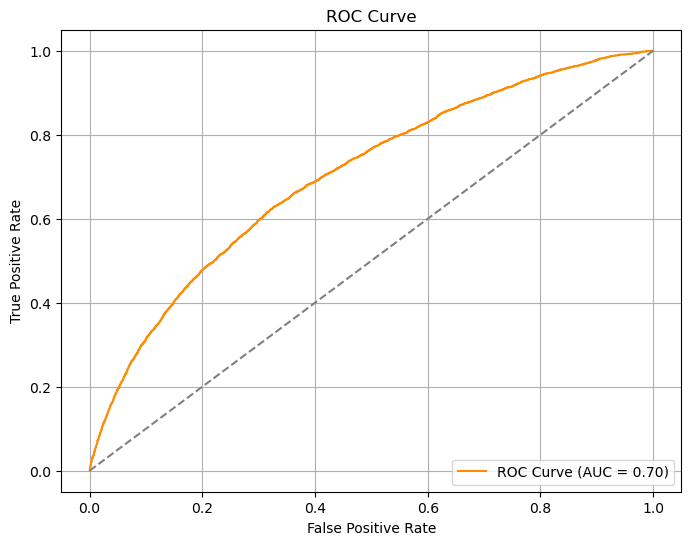

In [58]:
y_proba = stack_model.predict_proba(X_test_top50)[:, 1]

# --- ROC Curve ---
fpr, tpr, roc_thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()

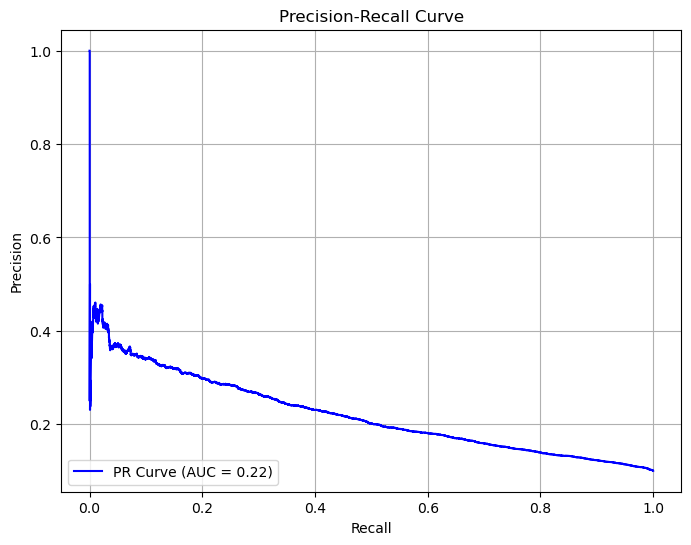

In [59]:
# --- Precision-Recall Curve ---
precision, recall, pr_thresholds = precision_recall_curve(y_test, y_proba)
pr_auc = auc(recall, precision)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'PR Curve (AUC = {pr_auc:.2f})', color='blue')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="lower left")
plt.grid()
plt.show()

MODEL COMPARISON REPORT

We evaluated several machine learning models to predict whether a customer will make a transaction, focusing on metrics that matter most for imbalanced classification problems such as recall, F1-score, and PR-AUC. Logistic Regression performed exceptionally well, achieving the highest recall of 76% and an F1-score of 0.40, making it the most effective at capturing class 1 cases. XGBoost provided a good balance with a recall of 42% and slightly better accuracy, while LightGBM offered similar results but with lower recall. Random Forest achieved high overall accuracy, but its recall for class 1 was extremely low (5%), making it unsuitable for this use case. The Stacking Classifier, which combines Logistic Regression, XGBoost, and LightGBM, achieved stable results with a recall of 42% and a balanced F1-score of 0.29. However, Logistic Regression outperformed all models in terms of recall and PR-AUC, which are critical for identifying rare positive cases. Therefore, we recommend Logistic Regression with class weights and threshold tuning as the best model for production, especially in applications where catching as many actual transaction cases as possible is more important than minimizing false positives.

REPORT ON CHALLANGES FACED

One of the major challenges in this project was the highly imbalanced target variable, where approximately 90% of the instances belonged to class 0 (no transaction), and only 10% belonged to class 1 (transaction). This imbalance caused many models to be biased toward the majority class, achieving high accuracy but failing to detect class 1 instances. To address this, we applied advanced resampling techniques like SMOTETomek, which combines synthetic oversampling (SMOTE) with Tomek Links undersampling. This helped in both balancing the classes and cleaning borderline noise, improving the model’s ability to learn class 1 patterns.

Another significant challenge was the anonymized nature of the dataset, where feature names and domain context were not provided. This made traditional exploratory data analysis (EDA) and domain-specific feature engineering impossible. To overcome this, we used feature importance techniques (via XGBoost) to rank features and selected the top 50 and 100 most important ones to reduce dimensionality and remove noise, helping models focus on the most relevant information.

Additionally, we found that using the default classification threshold of 0.5 resulted in poor recall for class 1, even in models trained on balanced data. Therefore, we implemented threshold tuning using precision-recall curve analysis to identify the probability cutoff that maximized F1-score. This significantly improved recall while maintaining a reasonable precision level.

Finally, while training models like Random Forest and LightGBM, we observed that some models were not well suited for imbalanced classification even after tuning, so we used class weighting (e.g., class_weight='balanced' and scale_pos_weight) to penalize misclassification of the minority class more heavily. This made models like Logistic Regression and XGBoost more sensitive to class 1, resulting in better performance.

Overall, the challenges were addressed with appropriate and industry-standard techniques, ensuring that the final model is both effective and robust for detecting future customer transactions.